In [17]:
import pandas as pd
import numpy as np
import nltk
import random
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.data
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


In [18]:
anime=pd.read_csv("animes.csv")

In [19]:
anime.head()

,uid,title,synopsis,aired,episodes
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Oct 4, 2015 to Mar 27, 2016",25.0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Oct 10, 2014 to Mar 20, 2015",22.0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Jul 7, 2017 to Sep 29, 2017",13.0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Apr 5, 2009 to Jul 4, 2010",64.0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Jan 6, 2017",1.0


In [20]:
# songs.drop('link',axis=1)

In [21]:
anime['text'] = anime['synopsis'].str.replace(r'\n', '')
num=random.randrange(19300)
textin=anime['synopsis'][num]

In [22]:
word=word_tokenize(textin)
stop_words = set(stopwords.words('english'))
filtered_sentence = []
for w in word:
    if w not in stop_words:
        filtered_sentence.append(w)

sen= ' '.join([str(elem) for elem in filtered_sentence])


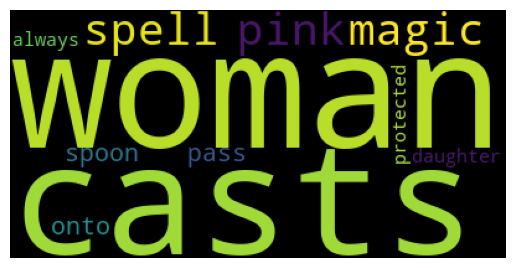

In [23]:
w = WordCloud().generate(sen)
plt.imshow(w)
plt.axis("off")
plt.show()

In [24]:
print("Anime:",anime['title'][num],"\nNumber of episodes:",anime['episodes'][num],"\n")
sid = SentimentIntensityAnalyzer()
pscore=sid.polarity_scores(textin)

print("Positivity Score:",pscore['pos']*100)
for word in filtered_sentence:
    comp = sid.polarity_scores(word)
    if(comp['pos']>0):
        print(word, end=" ")

print("\nNegativity Score:",pscore['neg']*100)
for word in filtered_sentence:
    comp = sid.polarity_scores(word)
    if(comp['neg']>0):
        print(word,end=" ")
print("\nNeutral Score:",pscore['neu']*100)

Anime: Pink Jumon 
Number of episodes: nan 

Positivity Score: 13.900000000000002
protected 
Negativity Score: 0.0

Neutral Score: 86.1
